# **Use of pandas, numpy, seaborn, matplotlib, OS library in python.**

1. **Pandas**

Purpose: Data manipulation and analysis.

Key Features:
* Data structures like DataFrames and Series.
* Handling of missing data.
* Data alignment and integration.
* Group by operations and merging/joining of datasets.
* Importing and exporting data to various formats (CSV, Excel, SQL, etc.).

---

2. **NumPy**

Purpose: Numerical computing.

Key Features:
* N-dimensional array objects.
* Mathematical functions for operations on arrays.
* Tools for integrating C/C++ and Fortran code.
* Random number generation and linear algebra operations.

---

3. **Seaborn**

Purpose: Statistical data visualization.

Key Features:
* Built on top of Matplotlib.
* High-level interface for drawing attractive and informative statistical graphics.
* Themes for styling Matplotlib graphics.
* Functions to visualize univariate and bivariate distributions.
* Functions for visualizing linear regression models.

---

4. **Matplotlib**

Purpose: 2D plotting and visualization.

Key Features:
* Comprehensive library for creating static, animated, and interactive visualizations.
* Supports a wide range of plots such as line, bar, scatter, histogram, etc.
* Customization of plots (titles, labels, colors, etc.).
* Integration with other libraries like Pandas and NumPy.

---

5. **OS**

Purpose: Interacting with the operating system.

Key Features:
* File and directory manipulation (create, delete, rename, etc.).
* Accessing environment variables.
* Running system commands.
* Path manipulation.

# **Data Cleaning and Plotting Charts**

* **Importing Pandas library.**
* **Reading the csv file into DF.**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

original_DF = pd.read_csv("/Anaemic_Dataset.csv")

* **Displaying first 10 instances of the dataset.**

*Here it can be seen there are missing values(NaN) in the dataset. So we have to fill them or remove them.*

In [7]:
original_DF.head(10)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,NaN,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,NaN,NaN
4,5,M,NaN,30.6972,26.0158,12.4,No
5,6,NaN,45.0994,27.9645,26.9361,16.2,No
6,7,F,43.1457,30.1628,26.6915,8.6,Yes
7,8,F,43.6103,29.1099,27.2798,10.3,No
8,9,NaN,45.0423,NaN,25.7918,13.0,No
9,10,F,46.5143,27.4282,26.0575,9.7,Yes


* **Printing the info (Total no. of instances, number of non-null data per attribute and their data-type).**

*Here, we can see that there are a total of 104 instances. Also, there are null values present in our dataset.*

*In our dataset (Sex, Anaemic) attributes are categorical and (% Red Pixel, %Green Pixel, %Blue Pixel, Hb) are numeric(real).*

In [8]:
original_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           99 non-null     object 
 2   %Red Pixel    99 non-null     float64
 3   %Green pixel  101 non-null    float64
 4   %Blue pixel   99 non-null     float64
 5   Hb            101 non-null    float64
 6   Anaemic       100 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


*Below we see the frequency of null values in each attributes.*

In [9]:
original_DF.isnull().sum()

Number          0
Sex             5
%Red Pixel      5
%Green pixel    3
%Blue pixel     5
Hb              3
Anaemic         4
dtype: int64

# Filling/Replacing/Removing null values in Categorical attributes.

We can fill/remove null values by,
1. Filling null value with its previous value in the attribute.
2. Filling null value with its succesor value in the attribute.
3. Filling null value with the mode of the attribute.
4. Droping null values

In [15]:
# Filling null value with its previous value in the attribute.
DF1 = original_DF.copy()
DF1[['Sex', 'Anaemic']] = DF1[['Sex', 'Anaemic']].fillna(method='pad')
DF1.head(10)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,NaN,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,NaN,No
4,5,M,NaN,30.6972,26.0158,12.4,No
5,6,M,45.0994,27.9645,26.9361,16.2,No
6,7,F,43.1457,30.1628,26.6915,8.6,Yes
7,8,F,43.6103,29.1099,27.2798,10.3,No
8,9,F,45.0423,NaN,25.7918,13.0,No
9,10,F,46.5143,27.4282,26.0575,9.7,Yes


In [16]:
# Filling null value with its succesor value in the attribute.
DF2 = original_DF.copy()
DF2[['Sex', 'Anaemic']] = DF2[['Sex', 'Anaemic']].fillna(method='bfill')
DF2.head(10)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,NaN,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,NaN,No
4,5,M,NaN,30.6972,26.0158,12.4,No
5,6,F,45.0994,27.9645,26.9361,16.2,No
6,7,F,43.1457,30.1628,26.6915,8.6,Yes
7,8,F,43.6103,29.1099,27.2798,10.3,No
8,9,F,45.0423,NaN,25.7918,13.0,No
9,10,F,46.5143,27.4282,26.0575,9.7,Yes


In [19]:
# Filling null value with the mode of the attribute.
sex_mode = original_DF['Sex'].mode()[0]
anaemic_mode = original_DF['Anaemic'].mode()[0]

DF3 = original_DF.copy()
DF3['Sex'] = DF3['Sex'].replace(to_replace=np.nan, value = sex_mode)
DF3['Anaemic'] = DF3['Anaemic'].replace(to_replace=np.nan, value = anaemic_mode)
DF3.head(10)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,NaN,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,NaN,No
4,5,M,NaN,30.6972,26.0158,12.4,No
5,6,M,45.0994,27.9645,26.9361,16.2,No
6,7,F,43.1457,30.1628,26.6915,8.6,Yes
7,8,F,43.6103,29.1099,27.2798,10.3,No
8,9,M,45.0423,NaN,25.7918,13.0,No
9,10,F,46.5143,27.4282,26.0575,9.7,Yes


In [20]:
# Droping null values
DF4 = original_DF.dropna()
DF4.head(10)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
2,3,F,45.0107,28.9677,26.0215,11.7,No
6,7,F,43.1457,30.1628,26.6915,8.6,Yes
7,8,F,43.6103,29.1099,27.2798,10.3,No
9,10,F,46.5143,27.4282,26.0575,9.7,Yes
10,11,F,45.3506,29.1248,25.5246,12.6,No
11,12,F,44.4062,28.9298,26.6640,15.4,No
12,13,F,44.9642,30.5279,24.5079,4.8,Yes
13,14,M,45.0484,31.1049,23.8467,9.0,Yes
15,16,M,45.5842,28.7311,25.6848,14.0,No


# Filling/Replacing/Removing null values in Numerical attributes.

We can fill/remove null values by,
* Mean/Median/Mode imputation. (Here I will only show median imputation.)
* Droping null values (already shown above for categorical)

In [23]:
# Median Imputation (As I will later work with DF3 for charts. So I worked with it)
DF3['%Red Pixel'].fillna(DF3['%Red Pixel'].median(), inplace=True)
DF3['%Green pixel'].fillna(DF3['%Green pixel'].median(), inplace=True)
DF3['%Blue pixel'].fillna(DF3['%Blue pixel'].median(), inplace=True)
DF3['Hb'].fillna(DF3['Hb'].median(), inplace=True)

DF3.head(10)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,25.9994,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,12.6,No
4,5,M,45.4434,30.6972,26.0158,12.4,No
5,6,M,45.0994,27.9645,26.9361,16.2,No
6,7,F,43.1457,30.1628,26.6915,8.6,Yes
7,8,F,43.6103,29.1099,27.2798,10.3,No
8,9,M,45.0423,28.8820,25.7918,13.0,No
9,10,F,46.5143,27.4282,26.0575,9.7,Yes


# Displaying Charts

*I will work with DF3 now on.*

Displaying...
* Bar Chart: Display the average percentage of Red, Green, and Blue pixels by Sex.
* Pie Chart: Show the proportion of Anaemic vs. Non-Anaemic individuals.
* Line Chart: Illustrate the relationship between Number and Hb levels.
* Histogram: Display the distribution of Hb levels.

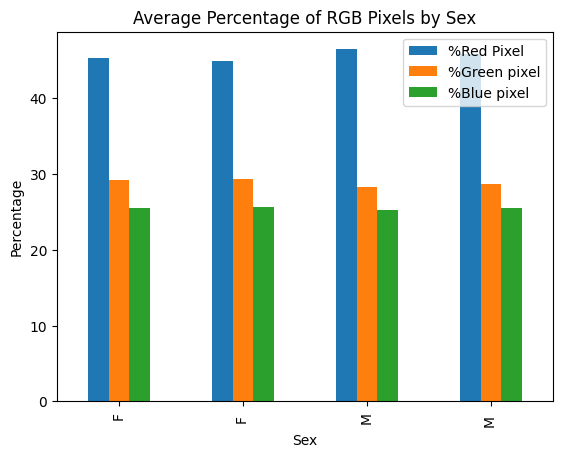

In [27]:
# Bar Chart: Average percentage of Red, Green, and Blue pixels by Sex
average_pixels = DF3.groupby('Sex')[['%Red Pixel', '%Green pixel', '%Blue pixel']].mean()
average_pixels.plot(kind='bar')
plt.title('Average Percentage of RGB Pixels by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.show()

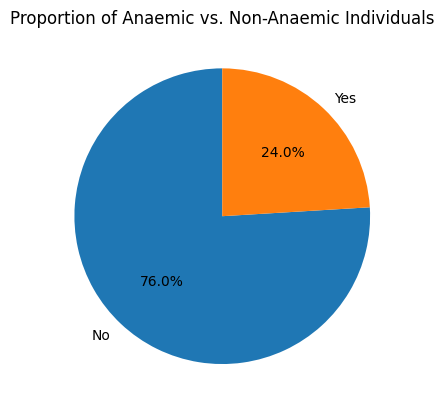

In [28]:
# Pie Chart: Proportion of Anaemic vs. Non-Anaemic individuals
anaemic_counts = DF3['Anaemic'].value_counts()
anaemic_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Anaemic vs. Non-Anaemic Individuals')
plt.ylabel('')
plt.show()

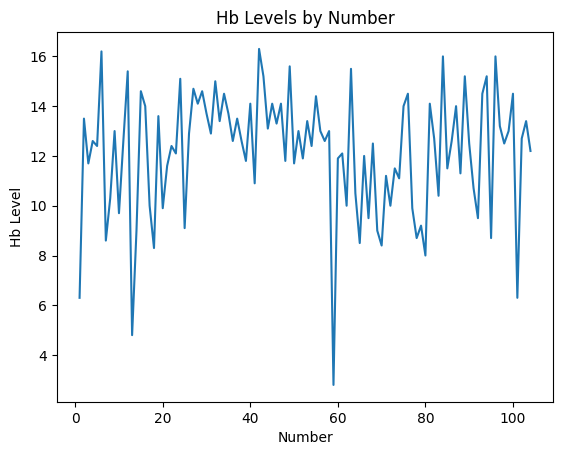

In [29]:
# Line Chart: Relationship between Number and Hb levels
plt.plot(DF3['Number'], DF3['Hb'])
plt.title('Hb Levels by Number')
plt.xlabel('Number')
plt.ylabel('Hb Level')
plt.show()

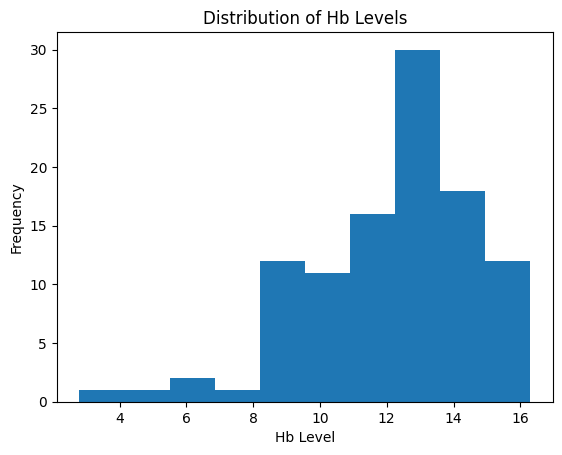

In [30]:
# Histogram: Distribution of Hb levels
DF3['Hb'].plot(kind='hist', bins=10)
plt.title('Distribution of Hb Levels')
plt.xlabel('Hb Level')
plt.ylabel('Frequency')
plt.show()